<a href="https://colab.research.google.com/github/kevinhenry/data-visualization/blob/main/viz_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19 Vaccination in the USA Analysis**

Learning more about how vaccinations of Americans are progressing over the last seven months.

Notebook imports

In [1]:
# Poetry dependencies
# pandas matplotlib jupyterlab seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Import the Data

In [2]:
# Google Colab file import
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import files

uploaded = files.upload()

Saving us_state_vaccinations.csv to us_state_vaccinations.csv


In [73]:
data = pd.read_csv('./us_state_vaccinations.csv')
# data.head(5)

In [39]:
# remove non-state entities
non_states = data['location'].isin(['Bureau of Prisons', 'Dept of Defense', 'United States', 'Veterans Health'])
data = data[~non_states]

In [79]:
# replace null values with zero
data=data.fillna(0)

In [81]:
data['year'] = date[0]
data['month'] = date[1]
data['day'] = date[2]

data.year = pd.to_numeric(data.year)
data.month = pd.to_numeric(data.month)
data.day = pd.to_numeric(data.day)

data.date = pd.to_datetime(data.date)

# data.head()

In [44]:
data.date.min()

Timestamp('2021-01-12 00:00:00')

In [45]:
data.date.max()

Timestamp('2021-07-22 00:00:00')

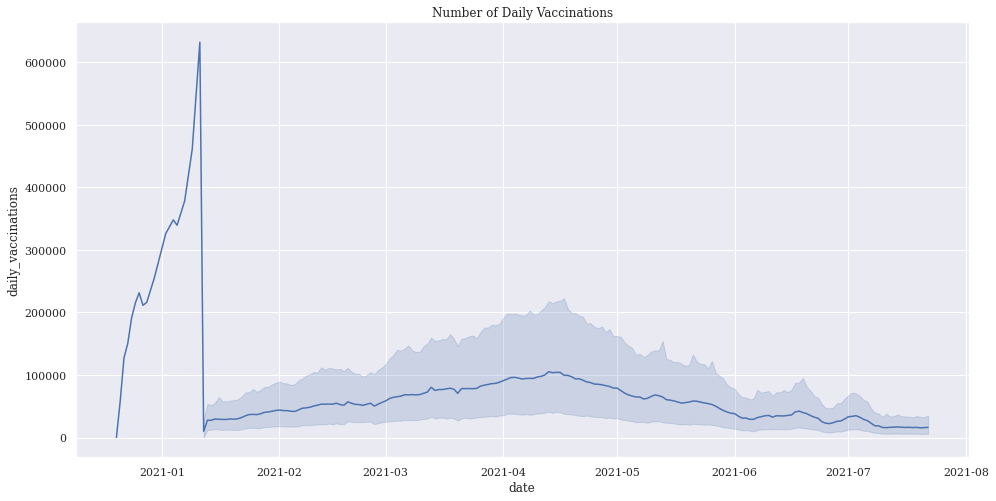

In [90]:
plt.figure(figsize=(16, 8))
sns.lineplot(x=data.date, y=data.daily_vaccinations)
plt.title('Number of Daily Vaccinations')
plt.show()
sns.set()
# sns.set(style='whitegrid')
sns.set_style('darkgrid')
sns.set(font='serif')
plt.show() 

Here we see the daily numbers. After an initial push in Januaary, daily vaccinations have stayed under 100K except for a short spike near mid-April.

In [82]:
# usa_df = data[data['country'] == 'United States']
usa_df = data['location']
# usa_df.head(5)

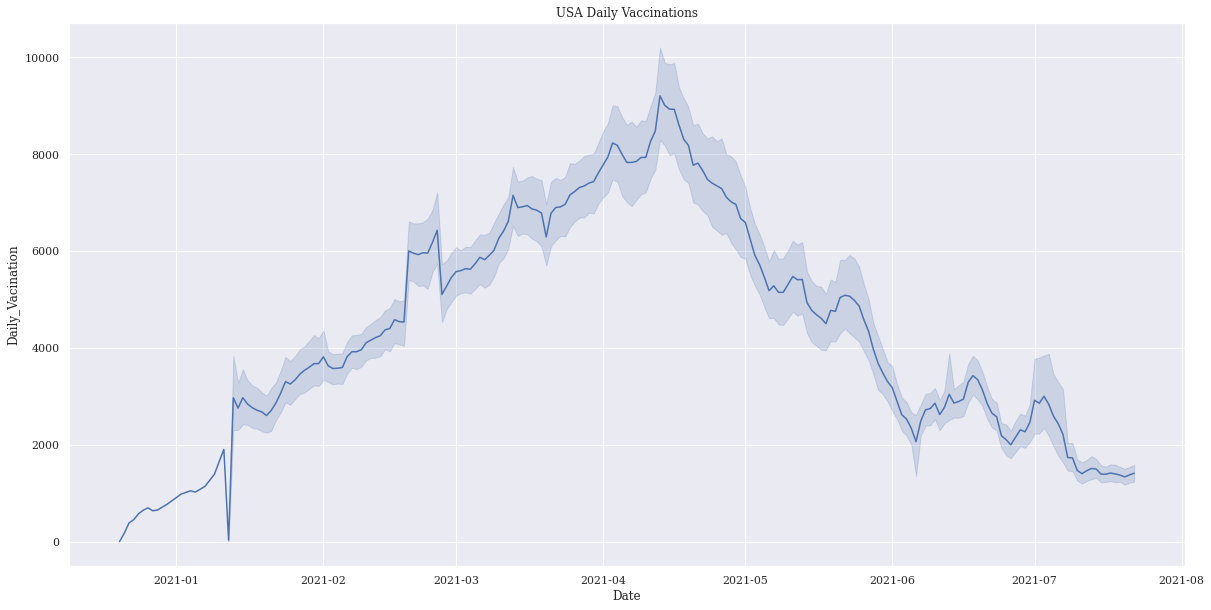

In [86]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=data.date, y=data.daily_vaccinations_per_million)
plt.xlabel('Date')
plt.ylabel('Daily_Vacination')
plt.title('USA Daily Vaccinations');

This visualization presents a good overview of our journey thus far with vaccinations.
- Early vaccinations began with a good climb as distribution systems got vaccine to those with a high priority for vaccination.
- There is an observable peak in April and then a steady dropoff until early June.
- In June the administration and MSM pushed for people to get vaccinated. Cautionary stories about the more contagious and Delta Variant have cause a bit of an increase, but there are lots of mixed messages out there.
- Now near the end the 7th month, we are at the lowest point of daily vaccinations since January. 

In [71]:
location = data.groupby('location')['total_vaccinations'].max().sort_values(ascending=False)[:5].index

top_states = pd.DataFrame(columns= data.columns)
for location in location:
  top_states = top_states.append(data.loc[data['location'] == location])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


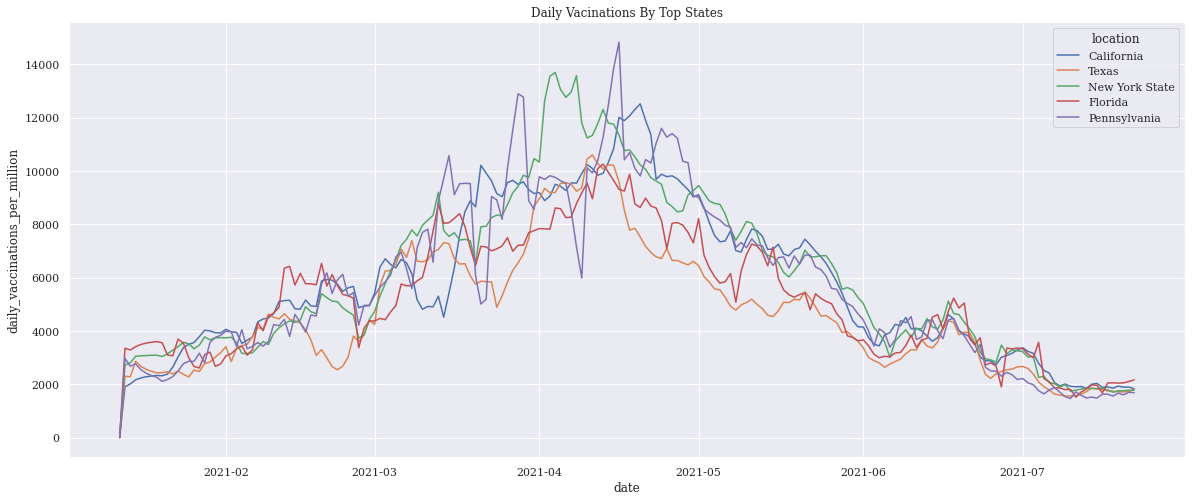

In [72]:
plt.figure(figsize=(20, 8))
sns.lineplot(top_states['date'],
             top_states['daily_vaccinations_per_million'],
             hue = top_states['location'], ci = False)
plt.title('Daily Vacinations By Top States');

Comparing the top five states, shows that their vaccination numbers are more on pace with each other than you may expect based on reporting from the mainstream media.

In [87]:
fully_vaccinated = data.groupby('location')['people_fully_vaccinated'].max().sort_values(ascending = False).head(25)
# fully_vaccinated.reset_index()

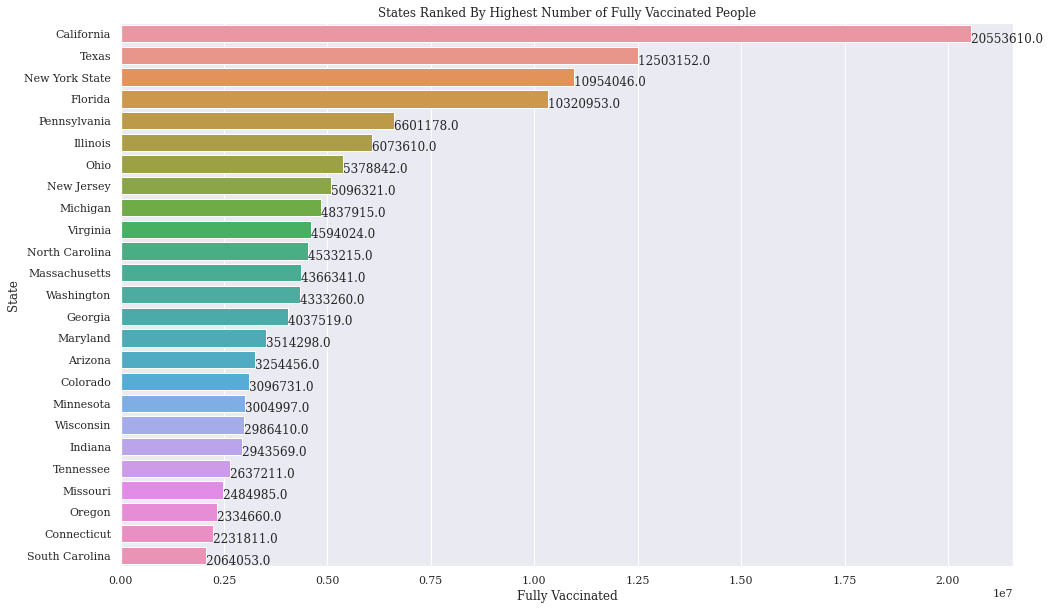

In [53]:
plt.figure(figsize=(16, 10))
ax = sns.barplot(x=fully_vaccinated, y=fully_vaccinated.index)
plt.xlabel('Fully Vaccinated')
plt.ylabel('State')
plt.title('States Ranked By Highest Number of Fully Vaccinated People');

for patch in ax.patches:
  width = patch.get_width()
  height = patch.get_height()
  x = patch.get_x()
  y = patch.get_y()

  plt.text(width + x, height + y, '{:.1f} '.format(width))

In this view we see the previously mentioned top five states and how they are outpacing the other 20 states on this table.

The US has been vaccinating the people since earler this year and peaked in April. We are now back at a low point for daily vaccinations. There are lots of viewpoints on taking the vaccine. So many points to be argued. Overall these visualizations should tell a story that we're all closer in this than being put out through various channels. There is still work to be done and lots of people to vaccinate. Grateful that we have these vaccines.